In [1]:
import pandas as pd
import numpy as np
import glob, os, matplotlib
from matplotlib import pyplot as plt
import datetime as dt
import time
from scipy.interpolate import make_interp_spline, BSpline
import scipy.optimize
pd.options.display.max_columns = 100
plt.style.use('seaborn-colorblind')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

In [2]:
listoffiles = [pd.read_csv(file) for file in glob.glob("csse_covid_19_data/csse_covid_19_daily_reports/*.csv")]

In [3]:
listoffiles[15].head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-17T11:53:10,67799,3111,56003,30.9756,112.2707
1,NaN,Italy,2020-03-17T18:33:02,31506,2503,2941,41.8719,12.5674
2,NaN,Iran,2020-03-17T15:13:09,16169,988,5389,32.4279,53.6880
3,NaN,Spain,2020-03-17T20:53:02,11748,533,1028,40.4637,-3.7492
4,NaN,Germany,2020-03-17T18:53:02,9257,24,67,51.1657,10.4515


In [4]:
df_all = pd.concat(listoffiles)

C:\Users\mendozm6\AppData\Roaming\Python\Python35\site-packages\ipykernel\__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


## Use Time Series Data

In [5]:
df_conf = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
df_dth = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')


In [6]:
#df_conf[''].sort_values().unique()
df_conf.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7


In [7]:
df_ca = df_conf[df_conf['Province/State']=='California']
df_ca

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20


In [8]:
df_wrld_conf = pd.DataFrame(df_conf.sum(numeric_only=True)).reset_index()[2:]
df_wrld_dth =  pd.DataFrame(df_dth.sum(numeric_only=True)).reset_index()[2:]
df_wrld_conf['CFR'] = (df_wrld_dth[0] / df_wrld_conf[0]) * 100
df_wrld_conf.columns = ['Date','Count','CFR']
df_wrld_conf['Date'] = pd.to_datetime(df_wrld_conf['Date'])

In [9]:
def isoState(df,state):
    df_st = df[df['Province/State']==state]
    df_st = df_st.drop(['Country/Region','Lat','Long'],axis=1)
    df_st = df_st.set_index('Province/State').T[-5:]
    df_st.reset_index(inplace=True)
    df_st.columns = ['Date','Count']
    df_st['Date'] = pd.to_datetime(df_st['Date'])
    #df_st.drop('Date',axis=1,inplace=True)
    return df_st.drop_duplicates()


def isoCountry(df,country):
    df_st = df[df['Country/Region']==country]
    df_st = df_st.drop(['Province/State','Lat','Long'],axis=1)
    df_cn = pd.DataFrame(df_st.sum(numeric_only=True)).reset_index()
    df_cn.columns = ['Date','Count']
    df_cn['Date'] = pd.to_datetime(df_cn['Date'])

    #df_cn.drop('Date',axis=1,inplace=True)
    #df_cn = df_cn.set_index('Country/Region').T[-5:]
    return df_cn.drop_duplicates()



C:\Users\mendozm6\AppData\Roaming\Python\Python35\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


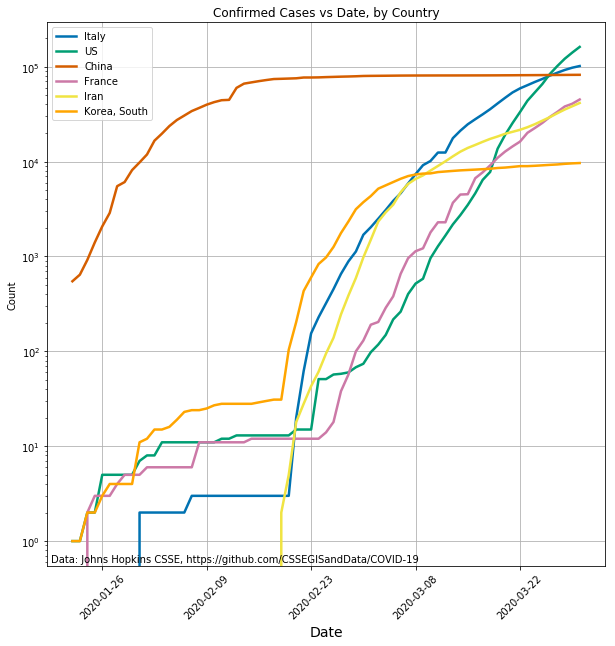

In [11]:
#df_ca_cnf = isoState(df_conf,'California')
df_it_cnf = isoCountry(df_conf,'Italy')#.reset_index()[:10]
df_us_cnf = isoCountry(df_conf,'US')#.reset_index()[:10]
df_ch_cnf = isoCountry(df_conf,'China')#.reset_index()[:10]
df_fr_cnf = isoCountry(df_conf,'France')#.reset_index()[:10]
df_in_cnf = isoCountry(df_conf,'Iran')#.reset_index()[:10]
df_sk_cnf = isoCountry(df_conf,'Korea, South')#.reset_index()[:10]



formats = dict(markersize=0,marker='o',linewidth=2.5)
#plt.plot(df_ca_cnf['Date'],df_ca_cnf['Count'],**formats, label='California')
plt.plot(df_it_cnf['Date'],df_it_cnf['Count'],**formats, label='Italy')
plt.plot(df_us_cnf['Date'],df_us_cnf['Count'],**formats, label='US')
plt.plot(df_ch_cnf['Date'],df_ch_cnf['Count'],**formats, label='China')
plt.plot(df_fr_cnf['Date'],df_fr_cnf['Count'],**formats, label='France')
plt.plot(df_in_cnf['Date'],df_in_cnf['Count'],**formats, label='Iran')
plt.plot(df_sk_cnf['Date'],df_sk_cnf['Count'],**formats, label='Korea, South',c='orange')



fig = plt.gcf(); ax = plt.gca()
fig.set_size_inches(10,10)
plt.legend()
ax.semilogy()
ax.set_title('Confirmed Cases vs Date, by Country')
plt.xticks(rotation=45)
ax.set_xlabel('Date',fontsize=14)
ax.set_ylabel('Count')
ax.grid()
fig.text(.13,.13,'Data: Johns Hopkins CSSE, https://github.com/CSSEGISandData/COVID-19')
fig.savefig('ConfirmedCases'+dt.datetime.strftime(dt.datetime.now().date(),'%m%d%Y')+'.png')

C:\Users\mendozm6\AppData\Roaming\Python\Python35\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


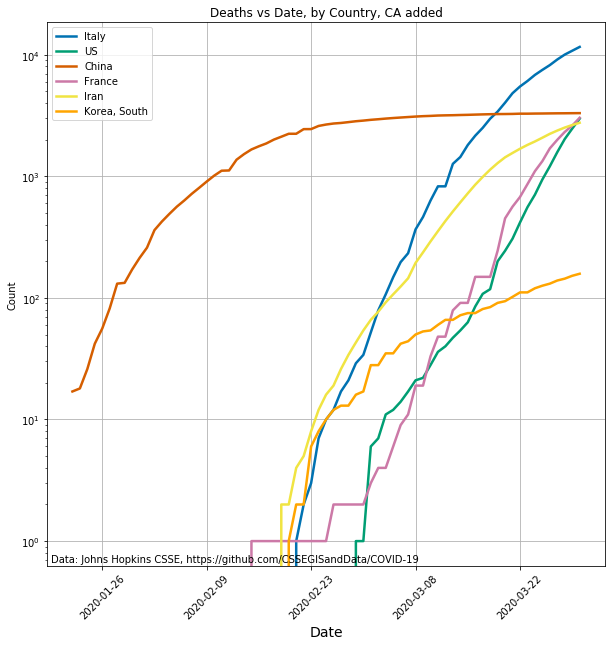

In [13]:
#df_ca_dth = isoState(df_dth,'California')
df_it_dth = isoCountry(df_dth,'Italy')#.reset_index()[:10]
df_us_dth = isoCountry(df_dth,'US')#.reset_index()[:10]
df_ch_dth = isoCountry(df_dth,'China')#.reset_index()[:10]
df_fr_dth = isoCountry(df_dth,'France')#.reset_index()[:10]
df_in_dth = isoCountry(df_dth,'Iran')#.reset_index()[:10]
df_sk_dth = isoCountry(df_dth,'Korea, South')#.reset_index()[:10]


formats = dict(markersize=0,marker='o',linewidth=2.5)
#plt.plot(df_ca_dth['Date'],df_ca_dth['Count'],**formats, label='California')
plt.plot(df_it_dth['Date'],df_it_dth['Count'],**formats, label='Italy')
plt.plot(df_us_dth['Date'],df_us_dth['Count'],**formats, label='US')
plt.plot(df_ch_dth['Date'],df_ch_dth['Count'],**formats, label='China')
plt.plot(df_fr_dth['Date'],df_fr_dth['Count'],**formats, label='France')
plt.plot(df_in_dth['Date'],df_in_dth['Count'],**formats, label='Iran')
plt.plot(df_sk_dth['Date'],df_sk_dth['Count'],**formats, label='Korea, South',c='orange')



fig = plt.gcf(); ax = plt.gca()
fig.set_size_inches(10,10)
plt.legend()
ax.semilogy()
ax.set_title('Deaths vs Date, by Country, CA added')
plt.xticks(rotation=45)
ax.set_xlabel('Date',fontsize=14)
ax.set_ylabel('Count')
ax.grid()
fig.text(.13,.13,'Data: Johns Hopkins CSSE, https://github.com/CSSEGISandData/COVID-19')

fig.savefig('Deaths_3152020.png')

C:\Users\mendozm6\AppData\Roaming\Python\Python35\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


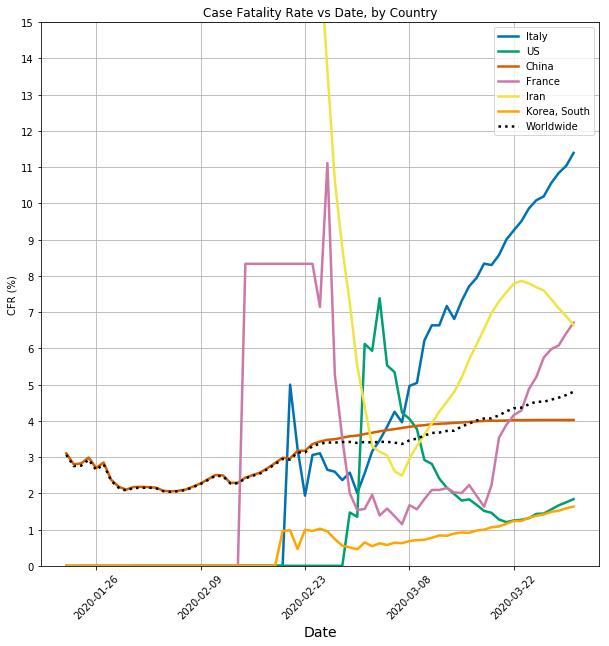

In [14]:
#df_ca_cnf['CFR'] = (df_ca_dth['Count'] / df_ca_cnf['Count']) * 100
df_it_cnf['CFR'] = (df_it_dth['Count'] / df_it_cnf['Count']) * 100
df_us_cnf['CFR'] = (df_us_dth['Count'] / df_us_cnf['Count']) * 100
df_ch_cnf['CFR'] = (df_ch_dth['Count'] / df_ch_cnf['Count']) * 100
df_fr_cnf['CFR'] = (df_fr_dth['Count'] / df_fr_cnf['Count']) * 100
df_in_cnf['CFR'] = (df_in_dth['Count'] / df_in_cnf['Count']) * 100
df_sk_cnf['CFR'] = (df_sk_dth['Count'] / df_sk_cnf['Count']) * 100


formats = dict(markersize=0,marker='o',linewidth=2.5)
#plt.plot(df_ca_cnf['Date'],df_ca_cnf['CFR'],**formats, label='California')
plt.plot(df_it_cnf['Date'],df_it_cnf['CFR'],**formats, label='Italy')
plt.plot(df_us_cnf['Date'],df_us_cnf['CFR'],**formats, label='US')
plt.plot(df_ch_cnf['Date'],df_ch_cnf['CFR'],**formats, label='China')
plt.plot(df_fr_cnf['Date'],df_fr_cnf['CFR'],**formats, label='France')
plt.plot(df_in_cnf['Date'],df_in_cnf['CFR'],**formats, label='Iran')
plt.plot(df_sk_cnf['Date'],df_sk_cnf['CFR'],**formats, label='Korea, South',c='orange')

plt.plot(df_wrld_conf['Date'],df_wrld_conf['CFR'],**formats, label='Worldwide', c='k',linestyle="dotted")


fig = plt.gcf(); ax = plt.gca()
fig.set_size_inches(10,10)
plt.legend()
#ax.semilogy()
ax.set_title('Case Fatality Rate vs Date, by Country')
plt.xticks(rotation=45)
ax.set_xlabel('Date',fontsize=14)
ax.set_ylabel('CFR (%)')
ax.set_yticks(list(range(16)))
ax.set_ylim(0,15)
ax.grid()
fig.savefig('CFR_'+dt.datetime.strftime(dt.datetime.now().date(),'%m%d%Y')+'.png')

C:\Users\mendozm6\AppData\Roaming\Python\Python35\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


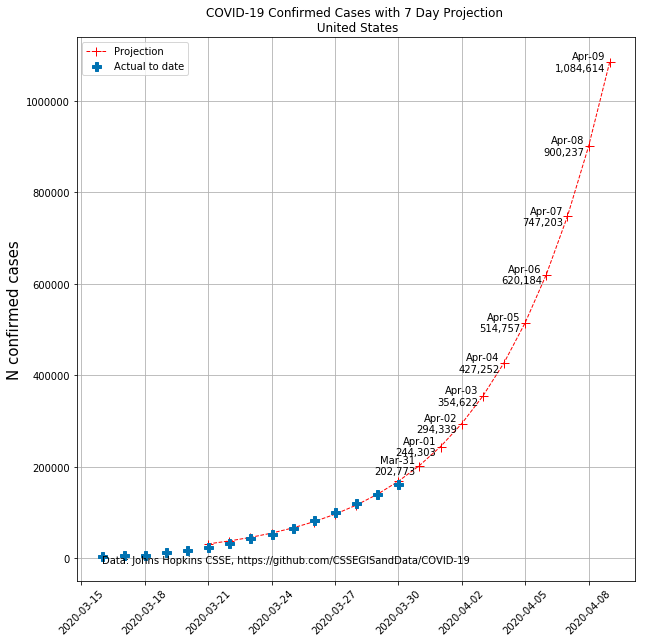

In [15]:
def NdayRegression(df,var,days=5):
    x = list(range(1,days+1))
    df_regress = df[['Date']][(-1*days):]
    y = df[var][(-1*days):].values
    [a,b], _ = scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t),  x,  y)
    x = list(range(1,2*days+1))
    prediction = a * np.exp([b*i for i in x])
    addtldates = [df_regress['Date'].iloc[-1]+dt.timedelta(days=i) for i in range(1,days+1)]
    df_regress = df_regress.append(pd.DataFrame({'Date':addtldates}))
    df_regress[var+'_forecast'] = prediction
    plt.plot(df_regress['Date'],df_regress[var+'_forecast'],c='red',linestyle='dashed',markersize=9,marker='+',linewidth=1,label='Projection')
    days_back = -1*days-5
    plt.plot(df['Date'][days_back:],df[var][days_back:],markersize=9,linewidth=0,marker='P',label='Actual to date')
    
    plt.xticks(rotation=45)
    plt.text(df['Date'].iloc[days_back],-10000,
             'Data: Johns Hopkins CSSE, https://github.com/CSSEGISandData/COVID-19')

    for i in range(1,days+1):
        loc = df_regress.iloc[-1*i].values
        plt.text(loc[0]-dt.timedelta(hours=5),loc[1],
                 s=dt.datetime.strftime(loc[0],'%b-%d')+'\n'+str(format(int(loc[1]),',')),
                 verticalalignment='center',horizontalalignment='right')
    plt.legend()
    plt.gcf().set_size_inches(10,10)
    plt.grid()

#test
NdayRegression(df_us_cnf,'Count',10)
fig = plt.gcf(); ax = plt.gca()
ax.set_ylabel('N confirmed cases',fontsize='15')
plt.title('COVID-19 Confirmed Cases with 7 Day Projection \n United States')
plt.savefig('US_Projected'+dt.datetime.strftime(dt.datetime.now().date(),'%m%d%Y')+'.png')

C:\Users\mendozm6\AppData\Roaming\Python\Python35\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


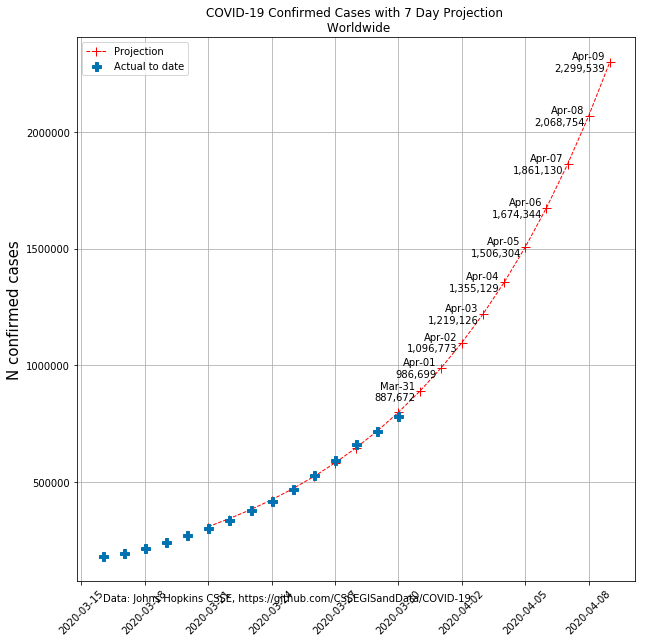

In [16]:
NdayRegression(df_wrld_conf,'Count',days=10)
fig = plt.gcf(); ax = plt.gca()
ax.set_ylabel('N confirmed cases',fontsize='15')
plt.title('COVID-19 Confirmed Cases with 7 Day Projection \n Worldwide')
plt.savefig('World_Projected'+dt.datetime.strftime(dt.datetime.now().date(),'%m%d%Y')+'.png')

## Case by Case Look

In [423]:
df_line = pd.read_csv('COVID19_line_list_data.csv')

In [19]:
df_line['RecoveredFlag'] = df_line['recovered'] != '0'

In [20]:
df_line['DeathFlag'] = df_line['death'] != '0'

In [21]:
df_line['reporting date'].sort_values().unique()

array(['1/13/2020', '1/15/2020', '1/17/2020', '1/20/2020', '1/21/2020',
       '1/22/2020', '1/23/2020', '1/24/2020', '1/25/2020', '1/26/2020',
       '1/27/2020', '1/28/2020', '1/29/2020', '1/30/2020', '1/31/2020',
       '2/1/2020', '2/10/2020', '2/11/2020', '2/12/2020', '2/13/2020',
       '2/14/2020', '2/15/2020', '2/16/2020', '2/17/2020', '2/18/2020',
       '2/19/2020', '2/2/2020', '2/20/2020', '2/21/2020', '2/22/2020',
       '2/23/2020', '2/24/2020', '2/25/2020', '2/26/2020', '2/27/2020',
       '2/28/2020', '2/29/2020', '2/3/2020', '2/4/2020', '2/5/2020',
       '2/6/2020', '2/7/2020', '2/8/2020', '2/9/2020', '3/1/2020',
       '3/10/2020', '3/11/2020', '3/12/2020', '3/13/2020', '3/2/2020',
       '3/3/2020', '3/4/2020', '3/5/2020', '3/6/2020', '3/7/2020',
       '3/8/2020', '3/9/2020', nan], dtype=object)

In [22]:
df_line[df_line['location']=='California'].to_csv('ca_cases.csv')